# 20240425筆記

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

In [ ]:
rect

In [ ]:
ellipse

In [ ]:
line1 = [0]*3+[255]*3+[0]*3
line2 = [255]*3+[0]*3+[255]*3
print(line1)
print(line2)

In [ ]:
img = np.array([line1]*3+[line2]*3+[line1]*3, dtype='uint8')

In [ ]:
img

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
cv2.erode(img, rect)

In [ ]:
cv2.erode(img, ellipse)

In [ ]:
kernel = np.array([[1, 1, 1]])
# kernel = np.array([[1], [1], [1]])

In [ ]:
img

In [ ]:
cv2.erode(img, kernel)

In [ ]:
plt.imshow(cv2.erode(img, kernel), cmap="gray")

In [ ]:
cv2.dilate(img, kernel)

## Thresholding v.s. adaptiveThresholding

In [ ]:
doc = cv2.imread('document.jpg', 0)

In [ ]:
plt.imshow(doc, cmap='gray')

In [ ]:
# import plotly.express as px
px.imshow(doc, color_continuous_scale="gray")

In [ ]:
thresh, thresh_doc = cv2.threshold(doc, 127, 255, cv2.THRESH_BINARY)

In [ ]:
plt.imshow(thresh_doc, cmap='gray')

In [ ]:
output1 = cv2.adaptiveThreshold(doc, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 7)

In [ ]:
plt.imshow(output1, cmap='gray')

In [ ]:
output2 = cv2.adaptiveThreshold(doc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 10)

In [ ]:
plt.imshow(output2, cmap='gray')

In [ ]:
px.imshow(output2, color_continuous_scale="gray")

## 重點整理

* Histogram
* Convolution (Filtering)
* Morphology (Erosion, Dilation)
* Thresholding

## Image Rotating, Flipping, Resizing

In [1]:
import skimage
from PIL import Image

In [ ]:
camera = skimage.data.camera()

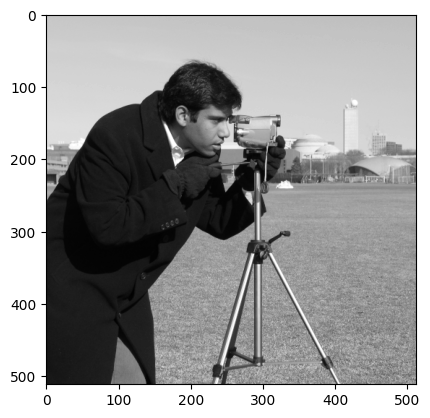

In [102]:
plt.imshow(camera, cmap='gray')

In [ ]:
plt.imshow(cv2.rotate(camera, cv2.ROTATE_90_CLOCKWISE), cmap='gray')

### 複習：PIL <==> ndarray

In [ ]:
# ndarray -> PIL image
pil_camera = Image.fromarray(camera)

In [ ]:
pil_camera

In [ ]:
resized = pil_camera.copy()
resized.thumbnail((200, 200))

In [ ]:
resized

In [ ]:
# PIL image -> ndarray
temp = resized.rotate(45, fillcolor='White')
camera_45 = np.array(temp)

In [ ]:
cv2.imshow('camera', camera_45)
cv2.waitKey(0)
cv2.destroyAllWindows()

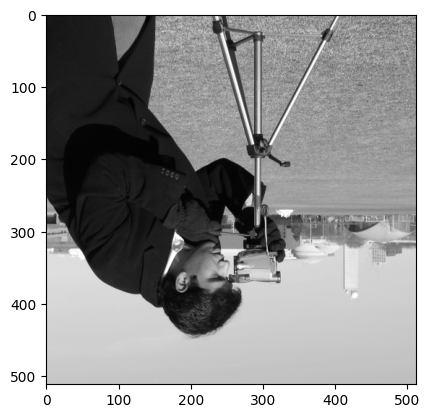

In [106]:
# 1: horizontal flip
# 0: vertical flip
# -1: horizontal + vertical
plt.imshow(cv2.flip(camera, 0), cmap='gray')

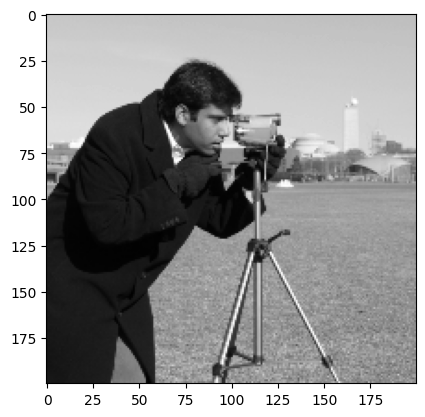

In [111]:
# dsize: desired size (200, 200)
plt.imshow(cv2.resize(camera, (200, 200)), cmap='gray')

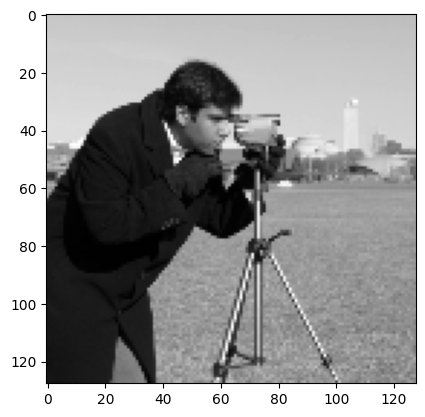

In [109]:
# fx: x scale
# fy: y scale
plt.imshow(cv2.resize(camera, None, fx=0.25, fy=0.25), cmap='gray')

## Draw Lines, Rectangles, Circles, and Text

In [3]:
import skimage
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
coffee = skimage.data.coffee()

In [12]:
type(coffee)

numpy.ndarray

In [13]:
coffee.shape

(400, 600, 3)

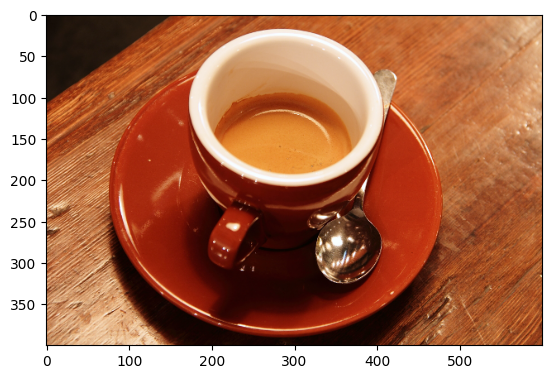

In [7]:
plt.imshow(coffee)

(-0.5, 599.5, 399.5, -0.5)

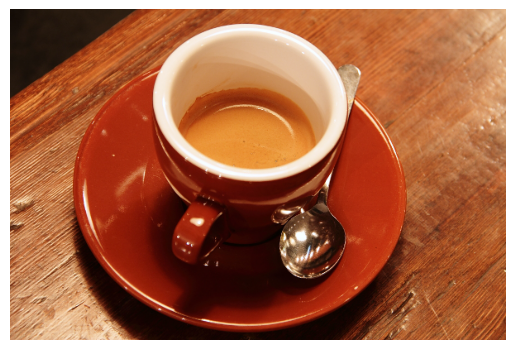

In [11]:
plt.imshow(coffee)
plt.axis('off')

In [15]:
Image.fromarray(coffee).size

(600, 400)

In [16]:
cv2.line(coffee, (0, 200), (599, 200), (0, 0, 255), 5)

array([[[ 21,  13,   8],
        [ 21,  13,   9],
        [ 20,  11,   8],
        ...,
        [228, 182, 138],
        [231, 185, 142],
        [228, 184, 140]],

       [[ 21,  13,   7],
        [ 21,  13,   9],
        [ 20,  14,   7],
        ...,
        [228, 182, 136],
        [231, 185, 139],
        [229, 183, 137]],

       [[ 21,  14,   7],
        [ 23,  13,  10],
        [ 20,  14,   9],
        ...,
        [228, 182, 136],
        [228, 184, 137],
        [229, 185, 138]],

       ...,

       [[189, 124,  77],
        [214, 155, 109],
        [197, 141, 100],
        ...,
        [165,  86,  37],
        [161,  82,  41],
        [143,  67,  29]],

       [[207, 148, 102],
        [201, 142,  99],
        [196, 140,  97],
        ...,
        [154,  74,  37],
        [147,  66,  33],
        [145,  65,  31]],

       [[197, 141, 100],
        [195, 137,  99],
        [193, 138,  98],
        ...,
        [158,  73,  38],
        [144,  64,  30],
        [143,  60,  29]]

In [18]:
cv2.line(coffee, (300, 0), (300, 399), (0, 255, 0), 5)

array([[[ 21,  13,   8],
        [ 21,  13,   9],
        [ 20,  11,   8],
        ...,
        [228, 182, 138],
        [231, 185, 142],
        [228, 184, 140]],

       [[ 21,  13,   7],
        [ 21,  13,   9],
        [ 20,  14,   7],
        ...,
        [228, 182, 136],
        [231, 185, 139],
        [229, 183, 137]],

       [[ 21,  14,   7],
        [ 23,  13,  10],
        [ 20,  14,   9],
        ...,
        [228, 182, 136],
        [228, 184, 137],
        [229, 185, 138]],

       ...,

       [[189, 124,  77],
        [214, 155, 109],
        [197, 141, 100],
        ...,
        [165,  86,  37],
        [161,  82,  41],
        [143,  67,  29]],

       [[207, 148, 102],
        [201, 142,  99],
        [196, 140,  97],
        ...,
        [154,  74,  37],
        [147,  66,  33],
        [145,  65,  31]],

       [[197, 141, 100],
        [195, 137,  99],
        [193, 138,  98],
        ...,
        [158,  73,  38],
        [144,  64,  30],
        [143,  60,  29]]

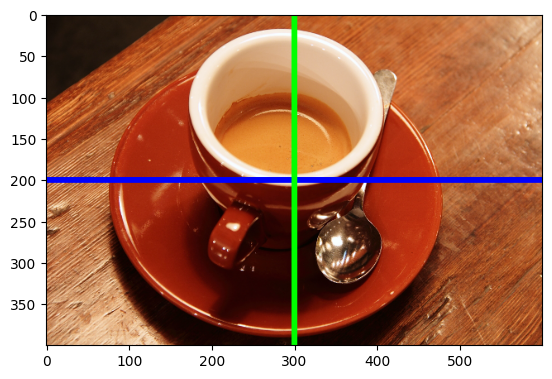

In [19]:
plt.imshow(coffee)

In [21]:
cv2.rectangle(coffee, (180, 0), (420, 220), (255, 0, 0), 5);

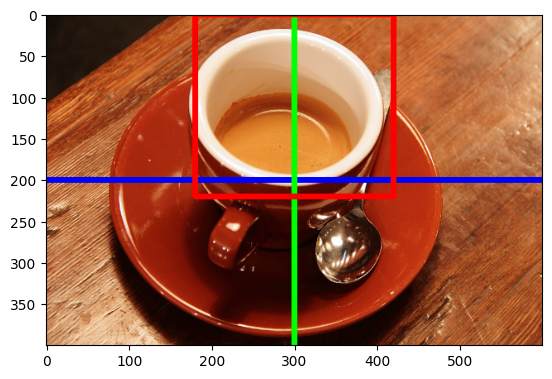

In [22]:
plt.imshow(coffee)

In [24]:
cv2.circle(coffee, (290, 150), 30, (0, 0, 255), 5);

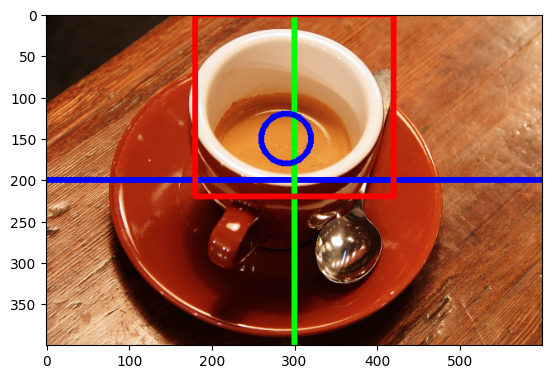

In [25]:
plt.imshow(coffee)